## Using the Astroalign module

This notebook is to familiarise with the astroalign module (https://astroalign.readthedocs.io/en/latest/index.html) in order to align astronomical data without using WCS information.

In [21]:
import numpy as np
import astroalign as aa
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy import units as u
from astropy.io import fits
from astropy.time import Time
from photutils import CircularAperture

In [22]:
## IMPORT EPOCH DATA ##
image_1 = 'PAL5_data\PAL5__e1\PAL5__e1_3p6um.fits'
image_2 = 'PAL5_data\PAL5__e2\PAL5__e2_3p6um.fits'

with fits.open(image_1) as hdr:
    header_1 = hdr[0].header
    time_1 = Time(header_1['DATE_OBS'])
    data_1 = fits.getdata(image_1, ext = 0)

with fits.open(image_2) as hdr:
    header_2 = hdr[0].header
    time_2 = Time(header_2['DATE_OBS'])
    data_2 = fits.getdata(image_2, ext = 0)
    
delta_time = time_2 - time_1
delta_1_2 = delta_time.sec

d_1 = np.array(data_1)
d_2 = np.array(data_2)

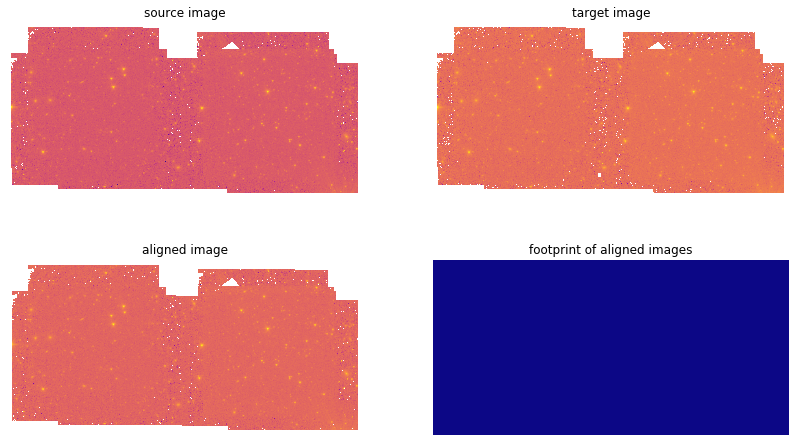

In [23]:
## PERFORM IMAGE ALIGNMENT ##

aligned_img, footprint = aa.register(d_1, d_2)

## PLOT IMAGES ##

fig, axes = plt.subplots(2, 2, figsize = (14, 8))

axes[0, 0].imshow(data_1, cmap = 'plasma', norm = LogNorm(), origin = 'lower', interpolation = 'nearest')
axes[0, 0].set_title('source image')
axes[0, 0].axis('off')

axes[0, 1].imshow(data_2, cmap = 'plasma', norm = LogNorm(), origin = 'lower', interpolation = 'nearest')
axes[0, 1].set_title('target image')
axes[0, 1].axis('off')

axes[1, 0].imshow(aligned_img, cmap = 'plasma', norm = LogNorm(), origin = 'lower', interpolation = 'nearest')
axes[1, 0].set_title('aligned image')
axes[1, 0].axis('off')

axes[1, 1].imshow(footprint, cmap = 'plasma', norm = LogNorm(), origin = 'lower', interpolation = 'nearest')
axes[1, 1].set_title('footprint of aligned images')
axes[1, 1].axis('off')

plt.show()
plt.close()

In [28]:
## DISPLAYING TRANSFORMATIONS ##

tf, (tf_source, tf_target) = aa.find_transform(d_1, d_2)

rot = u.Quantity(tf.rotation, u.rad)
deg_rot = rot.to_value(u.deg)

print('transformation matrix = \n{}\n'.format(tf.params))
print('rotation = {} deg\n'.format(deg_rot))
print('translation = {}\n'.format(tf.translation))
print('correspondence:\n')
for (x1, y1), (x2, y2) in zip(tf_source, tf_target):
    print('({}, {}) in source -> ({}, {}) in target)'.format(x1, y1, x2, y2))

transformation matrix = 
[[ 1.00003139e+00 -4.60946340e-04  1.61678916e-01]
 [ 4.60946340e-04  1.00003139e+00 -9.62024197e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

rotation = 0.026409448855690118 deg

translation = [ 0.16167892 -0.9620242 ]

correspondence:

(1388.3434006458294, 194.98529122910466) in source -> (1388.4948338963325, 194.67328044308275) in target)
(413.04709136256093, 261.9875900193353) in source -> (413.12456672986804, 261.1721254709162) in target)
(1372.9854358521648, 339.3033624066262) in source -> (1373.0211012291052, 339.12858704034664) in target)
(762.800538135008, 225.99293723529127) in source -> (762.8978429195057, 225.37331928919147) in target)
(113.04142433951682, 385.42843146145503) in source -> (113.08850025263902, 384.5919126057811) in target)
(466.81474966030686, 487.5357840387418) in source -> (466.7390660358329, 486.7695441991825) in target)
(678.9447860005764, 120.95940946184702) in source -> (678.9268212240025, 120.28015704193307) in tar